In [1]:
from src.Planners.H_MCTS_HW import H_MCTS_HW
from src.Planners.H_MCTS_wo_cycle.H_MCTS import H_MCTS_woCycle

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l1_rows = 8
l1_cols = 8
l1_width = 2
l1_height = 2
# H_level = 2
num_barrier = 15
random_seed= 25

explorationConstant = 1 / math.sqrt(2)
grid_setting = (l1_rows, l1_cols, l1_width, l1_height)

iter_Limit = 10000
H_level = 2

In [3]:
r = 0
dead_list = [3, 19, 22, 29, 37, 43, 50, 54, 59, 62, 79, 110]  # unfeasible set

num_set = 5

success_data = dict()
iteration_data = dict()

modules = ['H_woC', 'Plain_woC', 'H', 'Plain']

for module in modules:
    success_data[module] = []
    iteration_data[module] = []

Success_H = 0
Success_Plain = 0

H_level = 2
Plain_level = 1
for i in range(1):
    for random_seed in range(0, 112):
        if random_seed in dead_list:
            continue
        else:
            print(f'random seed is {random_seed}')
            H_mcts_woCycle = H_MCTS_woCycle(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            Plain_mcts_woCycle = H_MCTS_woCycle(grid_setting, iter_Limit=iter_Limit, H_level=Plain_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            H_woC_traj, H_woC_success, H_woC_iter = H_mcts_woCycle.search()
            Plain_woC_traj, Plain_woC_success, Plain_woC_iter = Plain_mcts_woCycle.search()
            
            H_mcts = H_MCTS_HW(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            Plain_mcts =  H_MCTS_HW(grid_setting, iter_Limit=iter_Limit, H_level=Plain_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            H_traj, H_success, H_iter = H_mcts.search()
            Plain_traj, Plain_success, Plain_iter = Plain_mcts.search()
            
            success_data['H_woC'].append(H_woC_success)
            success_data['Plain_woC'].append(Plain_woC_success)
            success_data['H'].append(H_success)
            success_data['Plain'].append(Plain_success)

            iteration_data['H_woC'].append(H_woC_iter)
            iteration_data['Plain_woC'].append(Plain_woC_iter)
            iteration_data['H'].append(H_iter)
            iteration_data['Plain'].append(Plain_iter)

random seed is 0
random seed is 1
random seed is 2
random seed is 4
random seed is 5
random seed is 6
random seed is 7
random seed is 8
random seed is 9
random seed is 10
random seed is 11
random seed is 12
random seed is 13
random seed is 14
random seed is 15
random seed is 16
random seed is 17
random seed is 18
random seed is 20
random seed is 21
random seed is 23
random seed is 24
random seed is 25
random seed is 26
random seed is 27
random seed is 28
random seed is 30
random seed is 31
random seed is 32
random seed is 33
random seed is 34
random seed is 35
random seed is 36
random seed is 38
random seed is 39
random seed is 40
random seed is 41
random seed is 42
random seed is 44
random seed is 45
random seed is 46
random seed is 47
random seed is 48
random seed is 49
random seed is 51
random seed is 52
random seed is 53
random seed is 55
random seed is 56
random seed is 57
random seed is 58
random seed is 60
random seed is 61
random seed is 63
random seed is 64
random seed is 65
r

In [4]:
df_success = pd.DataFrame(success_data)

df_success_rate = pd.DataFrame({
    'without Cycle': [df_success['Plain_woC'].mean(), df_success['H_woC'].mean()],
    'with Cycle': [df_success['Plain'].mean(), df_success['H'].mean()]
}, index=['Plain', 'H-MCTS'])

print(df_success_rate)

        without Cycle  with Cycle
Plain            0.76        0.99
H-MCTS           0.88        0.99


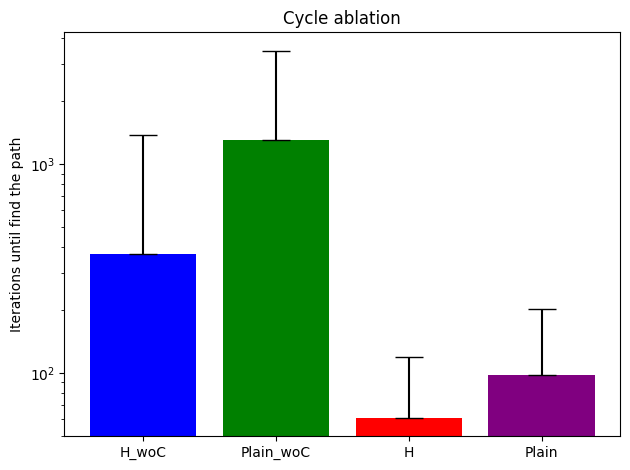

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the iteration_data based on success
filtered_iteration_data = {module: [] for module in modules}

for i in range(len(success_data['H_woC'])):
    if all([success_data[module][i] for module in modules]):
        for module in modules:
            filtered_iteration_data[module].append(iteration_data[module][i])

# Calculate mean and standard deviation
mean_data = {module: np.mean(filtered_iteration_data[module]) for module in modules}
std_data = {module: np.std(filtered_iteration_data[module]) for module in modules}

# Plotting the mean and standard deviation
labels = list(mean_data.keys())
mean_vals = list(mean_data.values())
std_vals = list(std_data.values())

x = np.arange(len(labels))  # the label locations

colors = ['blue', 'green', 'red', 'purple']  # Define colors for each module

fig, ax = plt.subplots()
for i in range(len(labels)):
    # Only positive error bars
    ax.bar(x[i], mean_vals[i], yerr=[[0], [std_vals[i]]], color=colors[i], capsize=10)

ax.set_yscale('log') # Change y-axis to log scale

# Remaining part of the code
ax.set_ylabel('Iterations until find the path')
ax.set_title('Cycle ablation')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

